# Grade: 100 points

# Assignment 01: Linear Regression

## Instructions

#### Follow These Steps before submitting your assignment 

1. Complete the notebook.

2. Make sure all plots have axis labels.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Submit one completed notebook for the group to OWL by the deadline.

6. Please note, a random seed of 42 needs to be set to ensure the reproducability of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

7. Make sure to reference all external code and documentation used.


# Q1 - Data Loading and Exploration

`Dataset_Assignment1.csv` lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

Age: Player age in years
Nationality: Players nationality
Overall: Player overall performance score (higher better)
Potential: Player potential score (higher better)
Club: Player home soccer club
Value: Player value i.e, the amount of money a club should pay in order to purchase the player (higher better)
Wage: Player stipend (higher better)
Preferred Foot: Player preferred foot to play
International Reputation: Player international fame (higher better)
Week Foot: Performance score of player weak foot (higher better)
Skill Moves: Player move skill score (higher better)
Body Type: Player body type
Position: Position player holds on the pitch
Height: Player height in CM
Weight: Player weight in kg

1. Load the dataset.
2. Display basic statistics and inspect for missing data.
3. Visualize the distribution of numerical columns.
4. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

In [1]:
import pandas as pd

df = pd.read_csv("Dataset_Assignment1.csv")

df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,Portugal,86,87,Manchester United,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
1,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
2,31,Belgium,91,91,Manchester City,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
3,25,Italy,86,89,Inter,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68
4,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,Right,4.0,4.0,3.0,Normal,Middle,177,75


c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


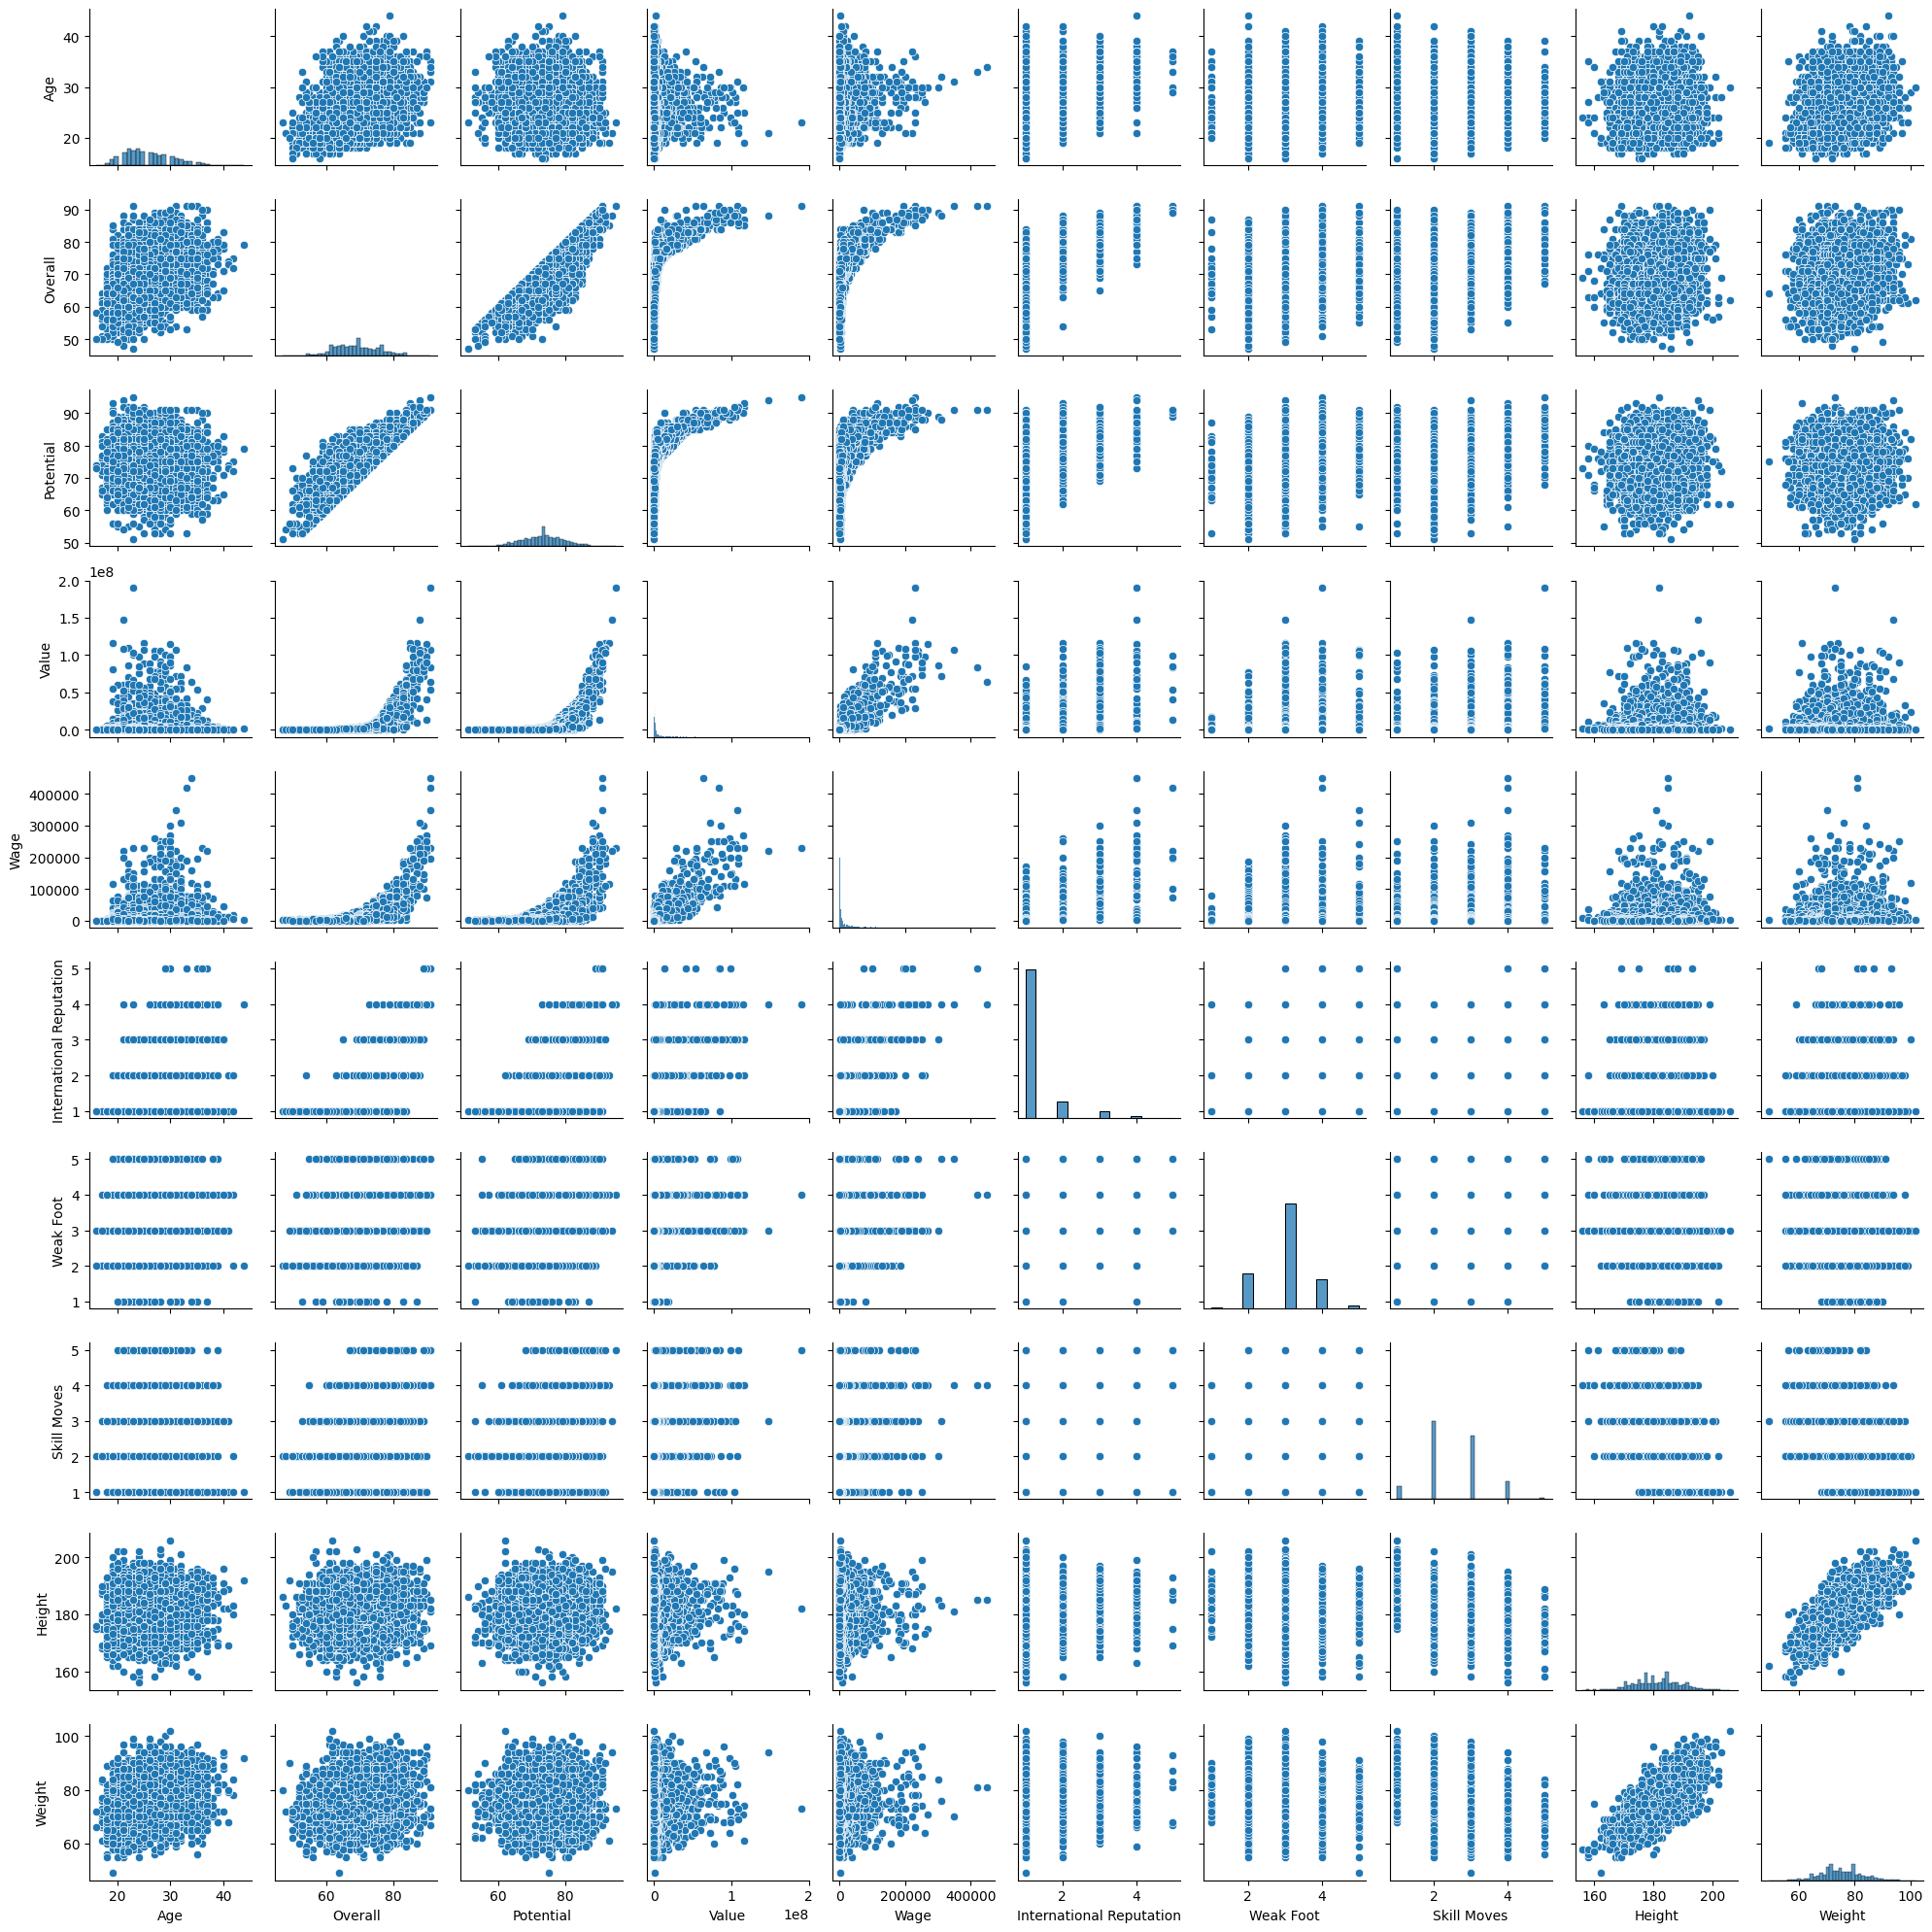

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, size=2)
plt.tight_layout()
plt.show()

**Answer to 4**: 

# Q2 - Feature extraction

1. Plot the joint distribution between `Weight` and `Height`.
2. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. 

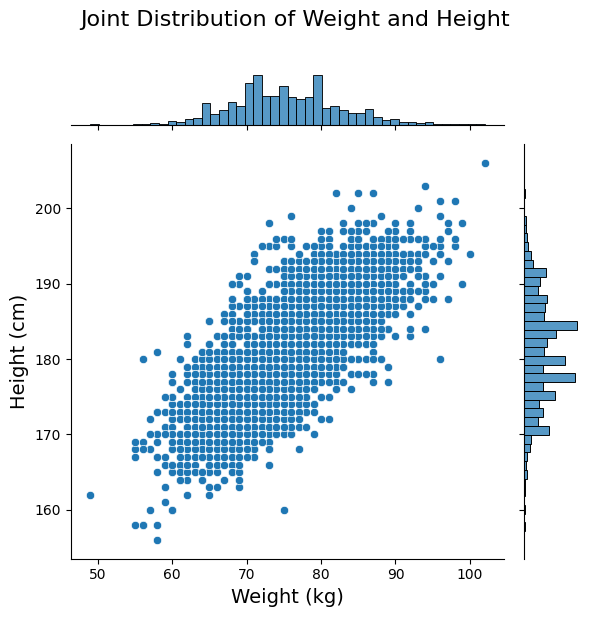

c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


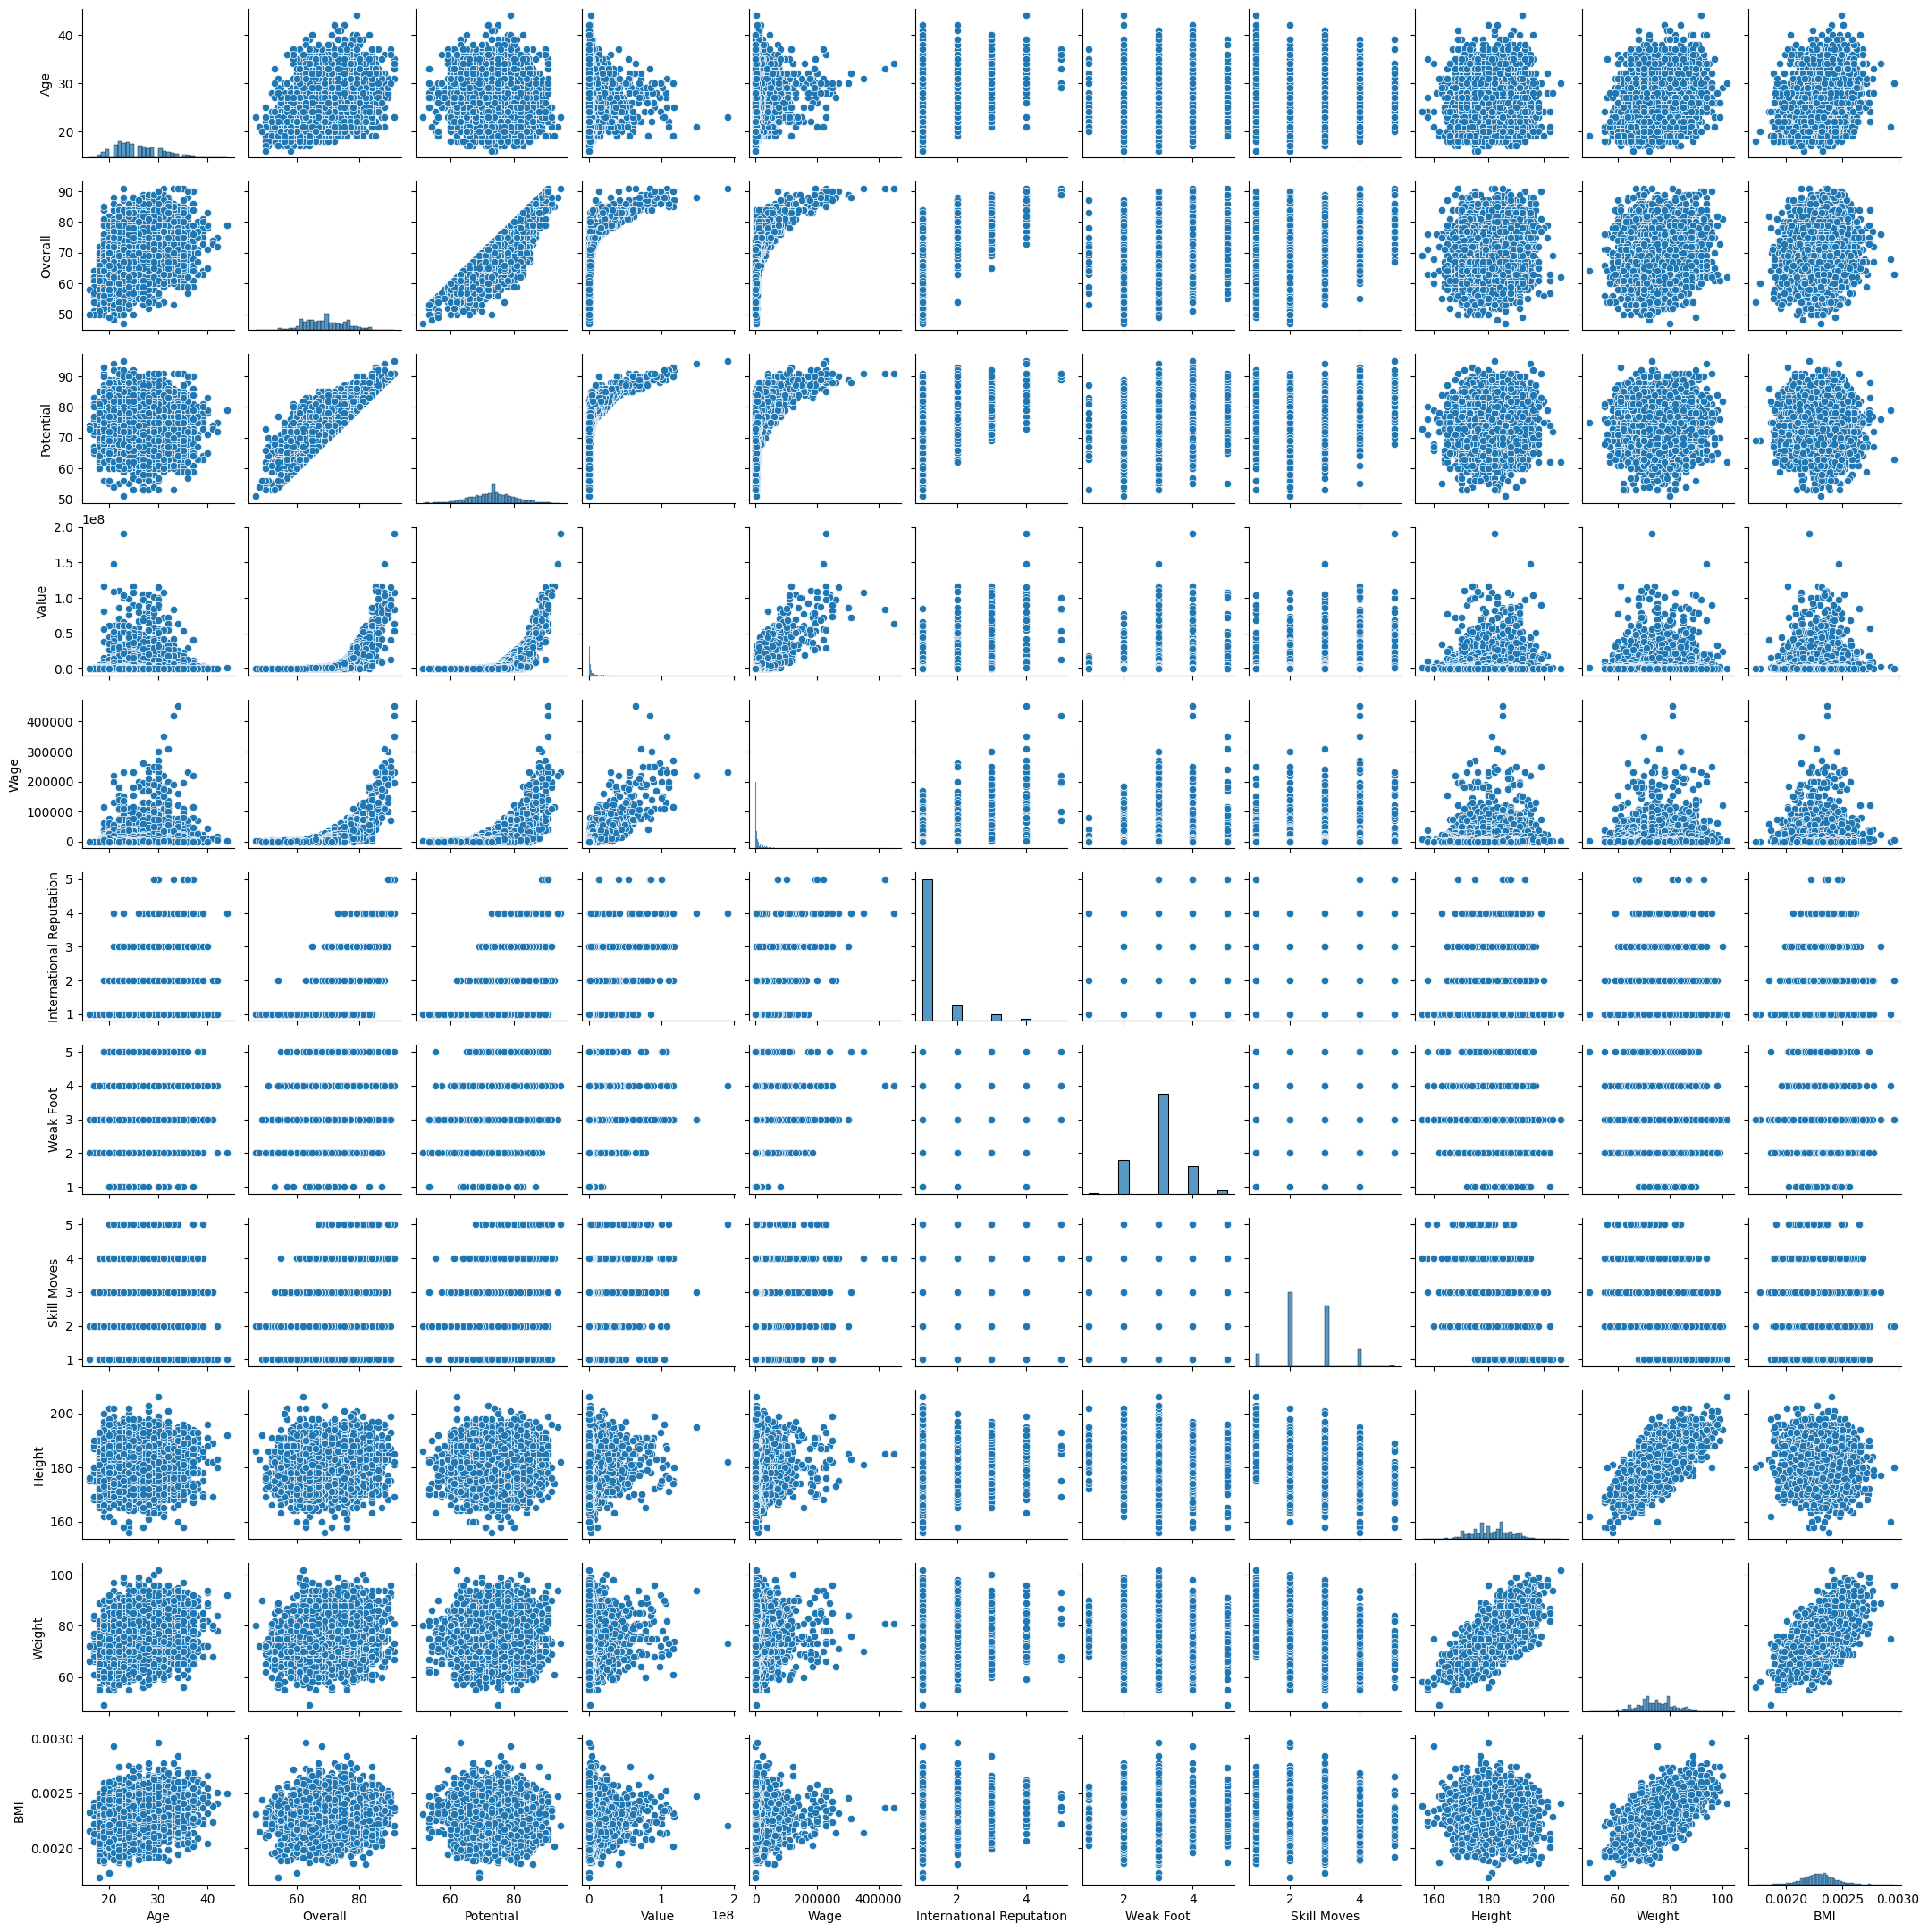

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the jointplot
joint_plot = sns.jointplot(
    data=df,
    x="Weight",
    y="Height",
    kind="scatter",
    height=6,
    ratio=6,
)

# Add labels and title
joint_plot.set_axis_labels("Weight (kg)", "Height (cm)", fontsize=14)
plt.suptitle("Joint Distribution of Weight and Height", y=1.02, fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

df['BMI'] = df['Weight']/(df['Height']**2)

# Create a pairplot to compare BMI with other columns
sns.pairplot(df, size=2)

# Drop Weight and Height
df = df.drop(['Weight', 'Height'], axis=1)

# Q3 - Correlation and Feature Selection

1. Compute correlation between numerical features.
2. Visualize correlations using a heatmap to identify highly correlated features.
3. Choose the most correlated feature with the target variable (`Value`) for simple linear regression.
4. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

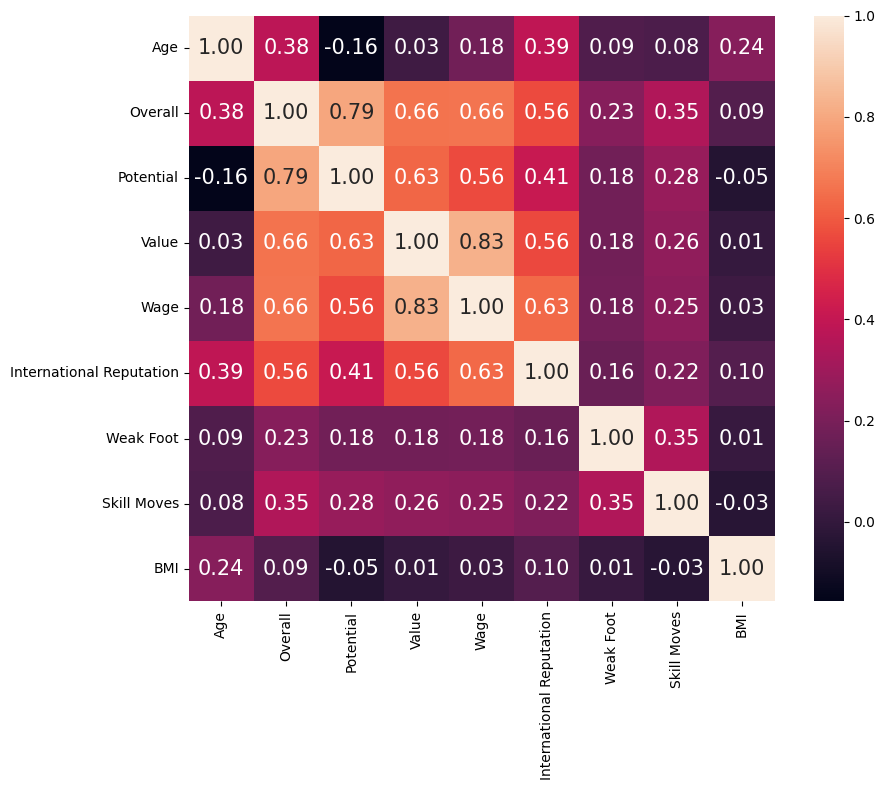

In [4]:
numerical_cols = ["Age", "Overall", "Potential", "Value", "Wage", "International Reputation", "Weak Foot", "Skill Moves", "BMI"]
import numpy as np

cm = np.corrcoef(df[numerical_cols].values.T)

# Increase figure size
plt.figure(figsize=(10, 8))

# Heatmap
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=numerical_cols,
                 xticklabels=numerical_cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

**Answer to 4**: 

# Q4 - Data Normalization & Simple Linear Regression

1. Select one highly correlated numerical feature and build a simple linear regression model to predict the target variable.
2. Split the data into 80% training and 20% test sets (use the random seed of 42). 
3. Normalize the dataset.
4. Rebuild the simple linear regression model with normalized data.
5. Compare the normalized and non-normalized data visually. 
6. Compare performance of the normalized and non-normalized models visually and using R² and RMSE.
7. **Discussion Question:** Why might normalizing data improve model performance? In which situations might normalization not be beneficial?
8. Visualize the relationship between the selected feature and the predicted target variable.
9. **Discussion Question:** What could cause a simple linear regression model to perform poorly, even if the correlation is high?

In [5]:
# Defining the model:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

C:\Users\xande\AppData\Local\Temp\ipykernel_25344\978501871.py:16: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


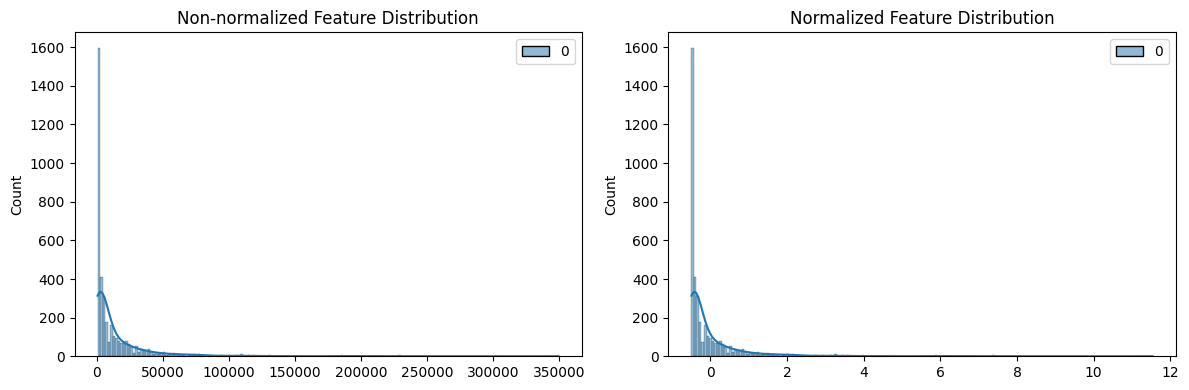

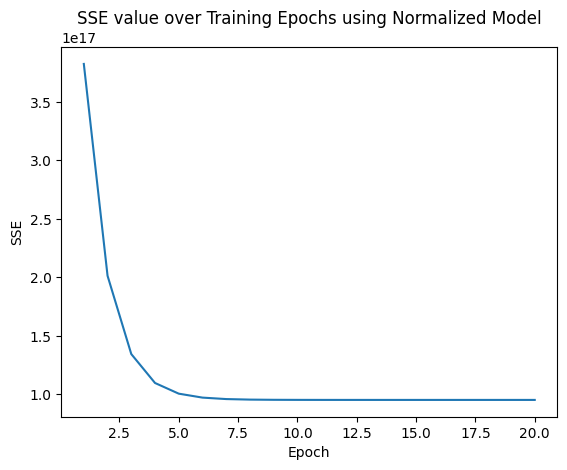

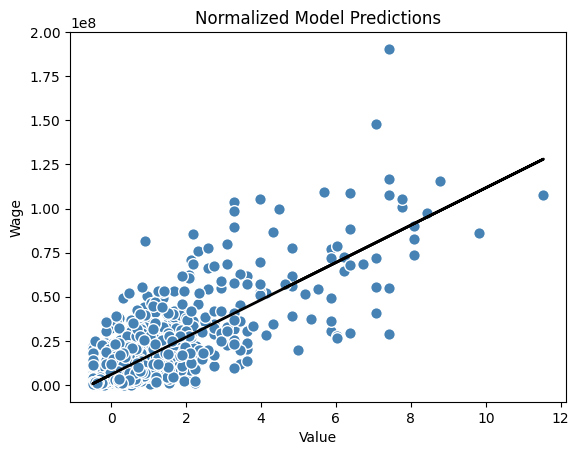

Normalized Model Performance:
R2 Score:  0.6093412087030832
RMSE:  64374515709220.53


In [6]:
# Choosing to compare Wage with the target variable Value as it has the highest correlation

# Separating target and attribute
X = df[['Wage']].values 
y = df['Value'].values

# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Create Linear Regression Model using Normalized Data
lin_reg_norm = LinearRegressionGD(eta=0.0001, n_iter=20)
lin_reg_norm.fit(X_train_std, y_train)

# Create Linear Regression Model using Non-Normalized Data
lin_reg_non_norm = LinearRegressionGD(eta=0.0001, n_iter=20)
lin_reg_non_norm.fit(X_train, y_train)

# Comparing Normalized and Non-Normalized Data Visually
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.histplot(X_train, kde=True)
plt.title('Non-normalized Feature Distribution')
plt.subplot(122)
sns.histplot(X_train_std, kde=True)
plt.title('Normalized Feature Distribution')
plt.tight_layout()
plt.show()

# Show SSE value over training epochs
plt.plot(range(1, lin_reg_norm.n_iter+1), lin_reg_norm.cost_)
plt.title('SSE value over Training Epochs using Normalized Model')
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

# Visualize the relationship between the selected feature and the predicted target variable (normalized model)
plt.scatter(X_train_std, y_train, c='steelblue', edgecolor='white', s=70)
plt.plot(X_train_std, lin_reg_norm.predict(X_train_std), color='black', lw=2)    
plt.title('Normalized Model Predictions')
plt.ylabel('Wage')
plt.xlabel('Value')
plt.show()

# Evaluate Normalized and Non-Normalized Models
from sklearn.metrics import r2_score, mean_squared_error

y_pred_norm = lin_reg_norm.predict(X_test_std)

linear_r2 = r2_score(y_test, y_pred_norm)
linear_rmse = mean_squared_error(y_test, y_pred_norm)

print("Normalized Model Performance:")
print(f"R2 Score: ", linear_r2)
print(f"RMSE: ", linear_rmse)

**Answer to 7**: 

**Answer to 9**: 

# Q 5 - Multiple Linear Regression

1. Select numerical features with correlation above certain thresholds (e.g., 0.3, 0.6, and 0.8).
2. Build three different multiple linear regression models using different sets of features based on correlation thresholds.
3. Evaluate and compare these models using R² and RMSE.
4. **Discussion Question:** How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?

In [7]:
# 1st Multiple Linear Regression Model predicting Value using:
# - BMI (0.01 correlation)
# - Age (0.03 correlation)
# - Weak Foot (0.18 correlation)

# Choosing Columns
X = df[["BMI", "Age", "Weak Foot"]].values
y = df['Value'].values

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Using Scikit-Learn Linear Regression Model
from sklearn.linear_model import LinearRegression
Mlr = LinearRegression()
Mlr.fit(X_train_std, y_train)

# Prediction
y_test_pred = Mlr.predict(X_test_std)

# Evaluation
first_mlr_r2 = r2_score(y_test, y_test_pred)
first_mlr_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print('R2 = ', first_mlr_r2)
print('RMSE = ', first_mlr_rmse)

R2 =  0.04898283836154327
RMSE =  12518502.01182852


c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
# 2nd Multiple Linear Regression Model predicting Value using:
# - Skill Moves (0.26 correlation)
# - International Reputation (0.56 correlation)
# - Potential (0.63 correlation)

# Choosing Columns
X = df[["Skill Moves", "International Reputation", "Potential"]].values
y = df['Value'].values

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Using Scikit-Learn Linear Regression Model
from sklearn.linear_model import LinearRegression
Mlr = LinearRegression()
Mlr.fit(X_train_std, y_train)

# Prediction
y_test_pred = Mlr.predict(X_test_std)

# Evaluation
second_mlr_r2 = r2_score(y_test, y_test_pred)
second_mlr_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print('R2 = ', second_mlr_r2)
print('RMSE = ', second_mlr_rmse)

R2 =  0.5385308620607161
RMSE =  8720261.673758844


c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [9]:
# 3rd Multiple Linear Regression Model predicting Value using:
# - Potential (0.63 correlation)
# - Overall (0.66 correlation)
# - Wage (0.81 correlation)

# Choosing Columns
X = df[["Potential", "Overall", "Wage"]].values
y = df['Value'].values

# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Using Scikit-Learn Linear Regression Model
from sklearn.linear_model import LinearRegression
Mlr = LinearRegression()
Mlr.fit(X_train_std, y_train)

# Prediction
y_test_pred = Mlr.predict(X_test_std)

# Evaluation
third_mlr_r2 = r2_score(y_test, y_test_pred)
third_mlr_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print('R2 = ', third_mlr_r2)
print('RMSE = ', third_mlr_rmse)

R2 =  0.6764232568921194
RMSE =  7302084.19400098


c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Answer to 4**: 

# Q6 - Model Evaluation and Comparison

1. Compare all models (simple and multiple regression models) by printing there R² and RMSE values.
2. **Discussion Question:** Which model performs the best and why?
3. **Discussion Question:** If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?
4. **Discussion Question:** Discuss next steps or potential improvements to the models.

In [10]:
print("SLR Model:")
print('R2 = ', linear_r2)
print('RMSE = ', linear_rmse, '\n')

print("1st MLR Model:")
print('R2 = ', first_mlr_r2)
print('RMSE = ', first_mlr_rmse, '\n')

print("2nd MLR Model:")
print('R2 = ', second_mlr_r2)
print('RMSE = ', second_mlr_rmse, '\n')

print("3rd MLR Model:")
print('R2 = ', third_mlr_r2)
print('RMSE = ', third_mlr_rmse, '\n')

SLR Model:
R2 =  0.6093412087030832
RMSE =  64374515709220.53 

1st MLR Model:
R2 =  0.04898283836154327
RMSE =  12518502.01182852 

2nd MLR Model:
R2 =  0.5385308620607161
RMSE =  8720261.673758844 

3rd MLR Model:
R2 =  0.6764232568921194
RMSE =  7302084.19400098 



**Answer to 2**: 

**Answer to 3**: 

**Answer to 4**: 